Thanks to juliencs work on features in A study on Regression applied to the Ames dataset.


In [3]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#njobs = 4

In [5]:
plt.style.use('ggplot')

In [2]:
%cd Desktop/

/Users/jimdoone/Desktop


In [5]:
%ls

1_Machine Learning A-Z Template Folder/
Apriori James.ipynb
Artificial_Neural_Networks Deep Learning.ipynb
Bayes_James_Classifier.ipynb
Decision_Tree_regression_trees.ipynb
Fill_NaN_columns_with_mean.ipynb
Grid Search Model Optimization.ipynb
Hierarchal Clustering James.ipynb
K_Fold Cross Validation.ipynb
K_Means Clustering James.ipynb
Kernel_SVM James.ipynb
LDA Feature Extraction.ipynb
Logistic Regression _james.ipynb
Make a Module PyCon Cleaning data wkbk.ipynb
Metrics.ipynb
Missing_no.ipynb
Multiple_Regression_Template.ipynb
PCA Kernel.ipynb
PCA Principal Component Analysis.ipynb
Polynomial_regression_template.ipynb
Practice_projects/
Random_Forest_Classification_James.ipynb
Random_Forest_Regression_James.ipynb
Recurrent_Neural_Networks/
Regression_Libraries.ipynb
SVM James.ipynb
SVR (regression) Template.ipynb
Thompson_Sampling_James.ipynb
Upper Confidence Bound Deterministic Reinforcement.ipynb
XGBoost.ipynb
Z_Housing_Price_ANN.ipynb
Z_Housing_Price_Backward_Elimination.ipynb
Z_Ho

In [61]:
df = pd.read_csv('train.csv')
df.drop('Id', axis=1, inplace=True)
df.head(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


##### Shape

In [62]:
print(f'df.csv shape is {df.shape}')

df.csv shape is (1460, 80)


##### Duplicates

In [64]:
#df.Id 
idsUnique = len(set(df.index))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print(f"There are {idsDupli} duplicate IDS for {idsTotal} total entries")

There are 0 duplicate IDS for 1460 total entries


##### Preprocessing
##### Outliers

In [65]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

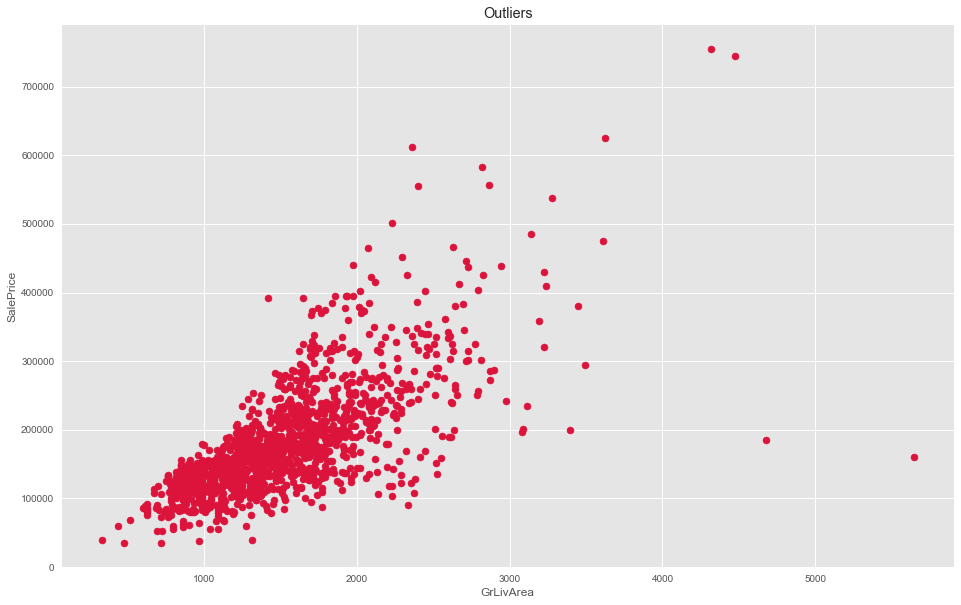

In [66]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='crimson')
plt.title('Outliers')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [67]:
df = df[df['GrLivArea'] < 3200]

In [68]:
df = df[df['GrLivArea'] > 630]

In [69]:
df['GrLivArea'].min()

672

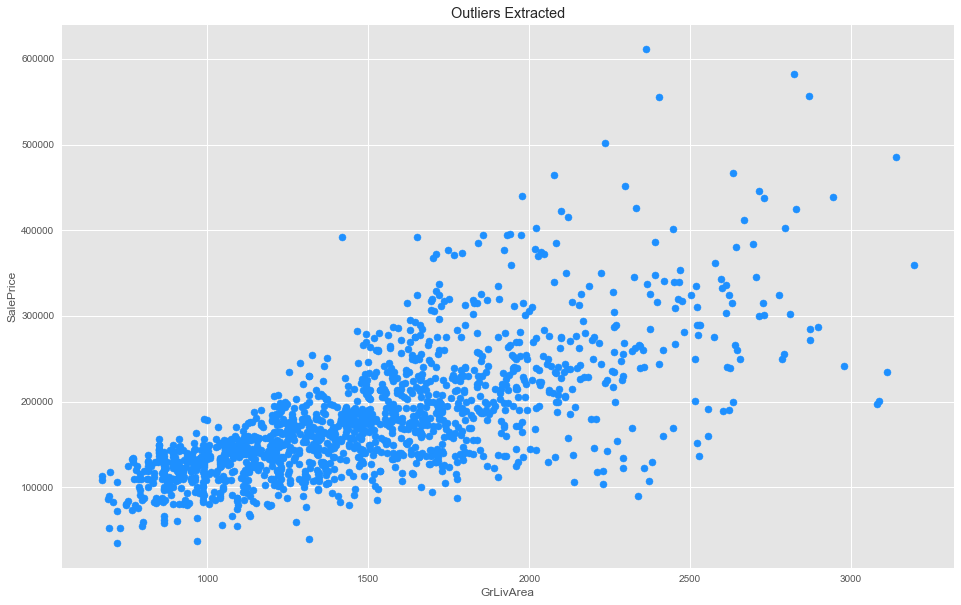

In [70]:
plt.figure(figsize=(16,10))
plt.scatter(df['GrLivArea'], df['SalePrice'], c='dodgerblue')
plt.title('Outliers Extracted')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

##### Log Transform Price
- Return the natural logarithm of one plus the input array, element-wise.

In [71]:
df['SalePrice'] = np.log1p(df['SalePrice'])

In [72]:
y = df['SalePrice']


##### Missing Values

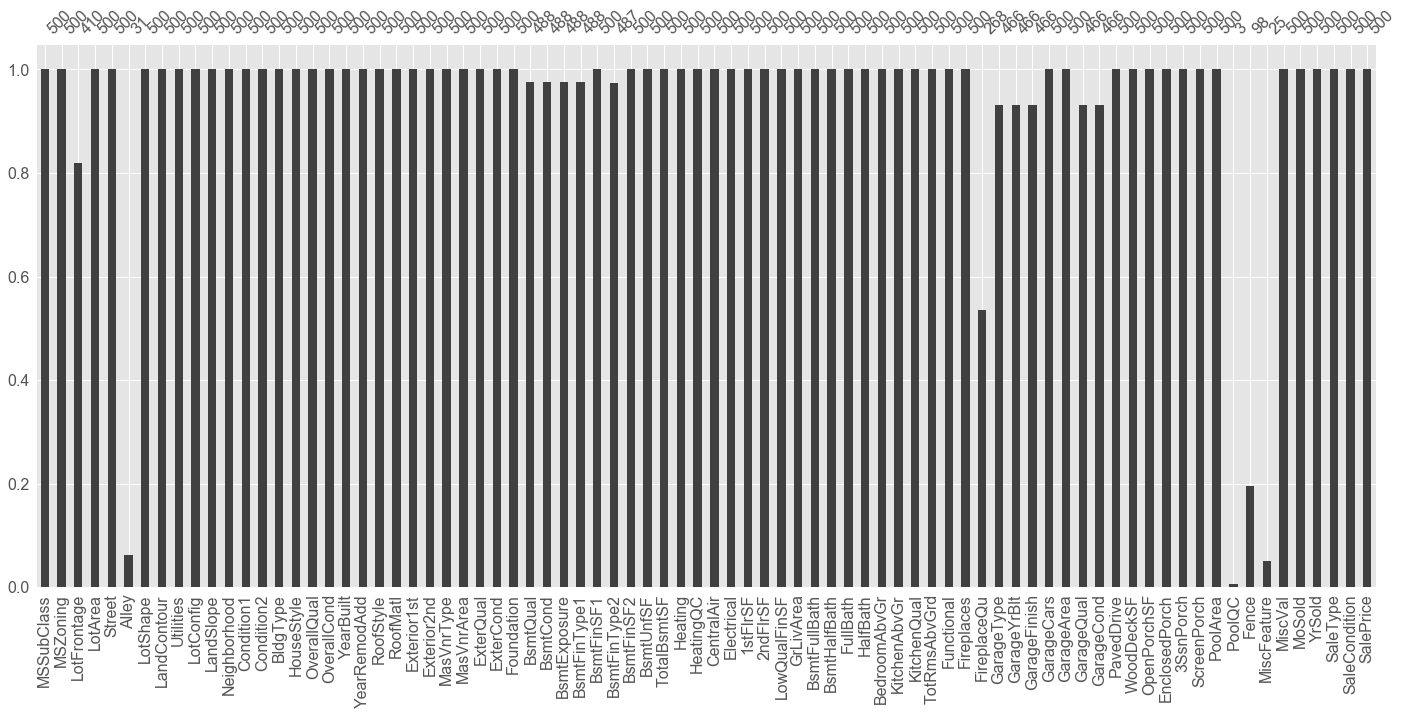

In [73]:
import missingno as msno
msno.bar(df.sample(500))

In [74]:
# Alley : data description says NA means "no alley access"
df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

In [75]:
# Some numerical features are actually really categories
df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [76]:
# Encode some categorical features as ordered numbers when there is information in the order
df = df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [77]:
# Create new features
# 1* Simplifications of existing features
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [78]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice            1.000
OverallQual          0.811
SimplOverallQual     0.702
GrLivArea            0.702
ExterQual            0.688
GarageCars           0.673
KitchenQual          0.671
GarageArea           0.648
SimplExterQual       0.641
TotalBsmtSF          0.633
BsmtQual             0.630
SimplKitchenQual     0.612
SimplBsmtQual        0.611
YearBuilt            0.610
1stFlrSF             0.595
FullBath             0.574
YearRemodAdd         0.569
GarageYrBlt          0.542
FireplaceQu          0.540
SimplFireplaceQu     0.510
TotRmsAbvGrd         0.504
Fireplaces           0.479
HeatingQC            0.471
MasVnrArea           0.416
SimplHeatingQC       0.396
BsmtFinSF1           0.380
GarageQual           0.353
GarageCond           0.353
BsmtExposure         0.347
BsmtFinType1         0.341
                     ...  
BsmtFullBath         0.251
LotArea              0.241
BsmtUnfSF            0.207
SimplBsmtCond        0.204
LotFron

In [79]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 68
Categorical features : 26


In [80]:
# Handle remaining missing values for numerical features by using median as replacement
print(f"NAs for numerical features in df : {df_num.isnull().values.sum()}")
df_num = df_num.fillna(df_num.median())
print(f"Remaining NAs for numerical features in df :{df_num.isnull().values.sum()}")

NAs for numerical features in df : 74
Remaining NAs for numerical features in df :0


In [81]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = df_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
df_num[skewed_features] = np.log1p(df_num[skewed_features])

53 skewed numerical features to log transform


##### Skewed Features After Log Transformation

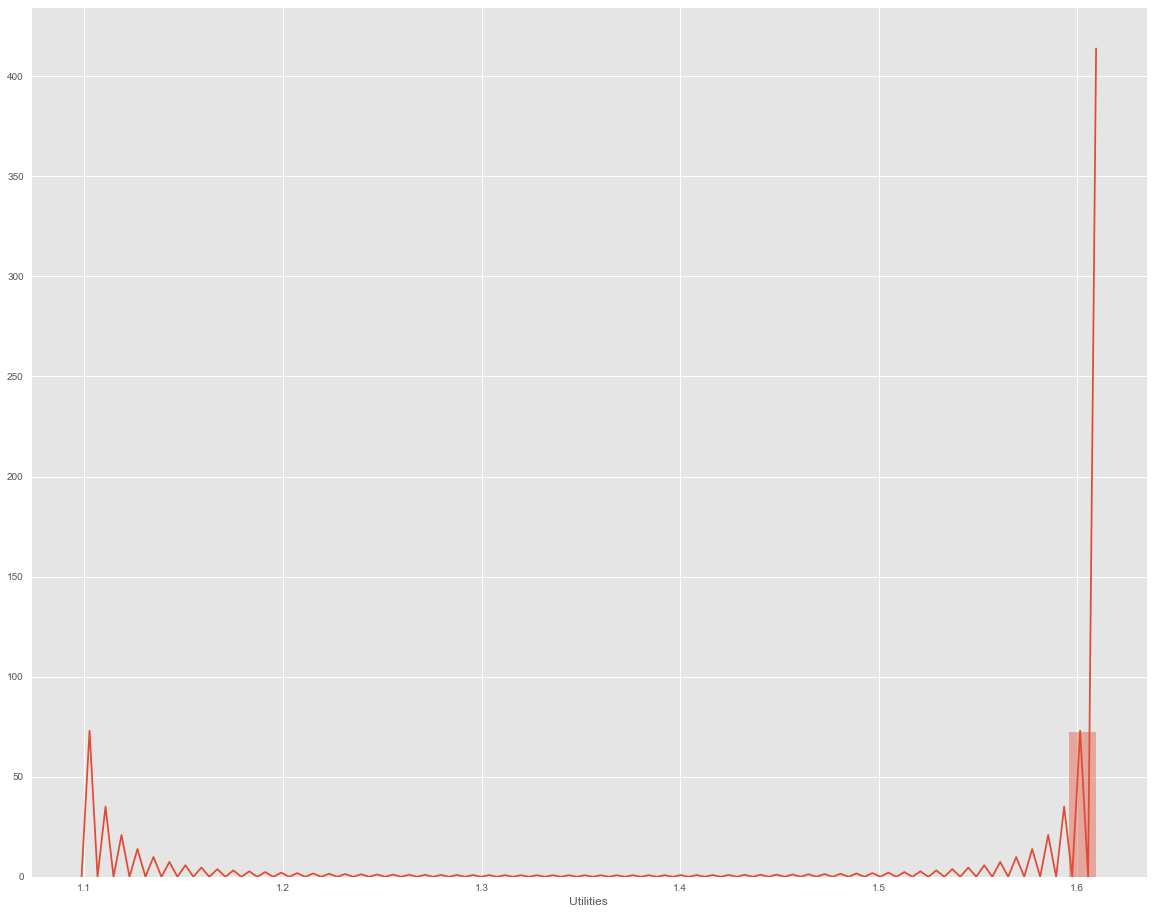

In [82]:
plt.figure(figsize=(20,16))
sns.distplot(df_num['Utilities']);


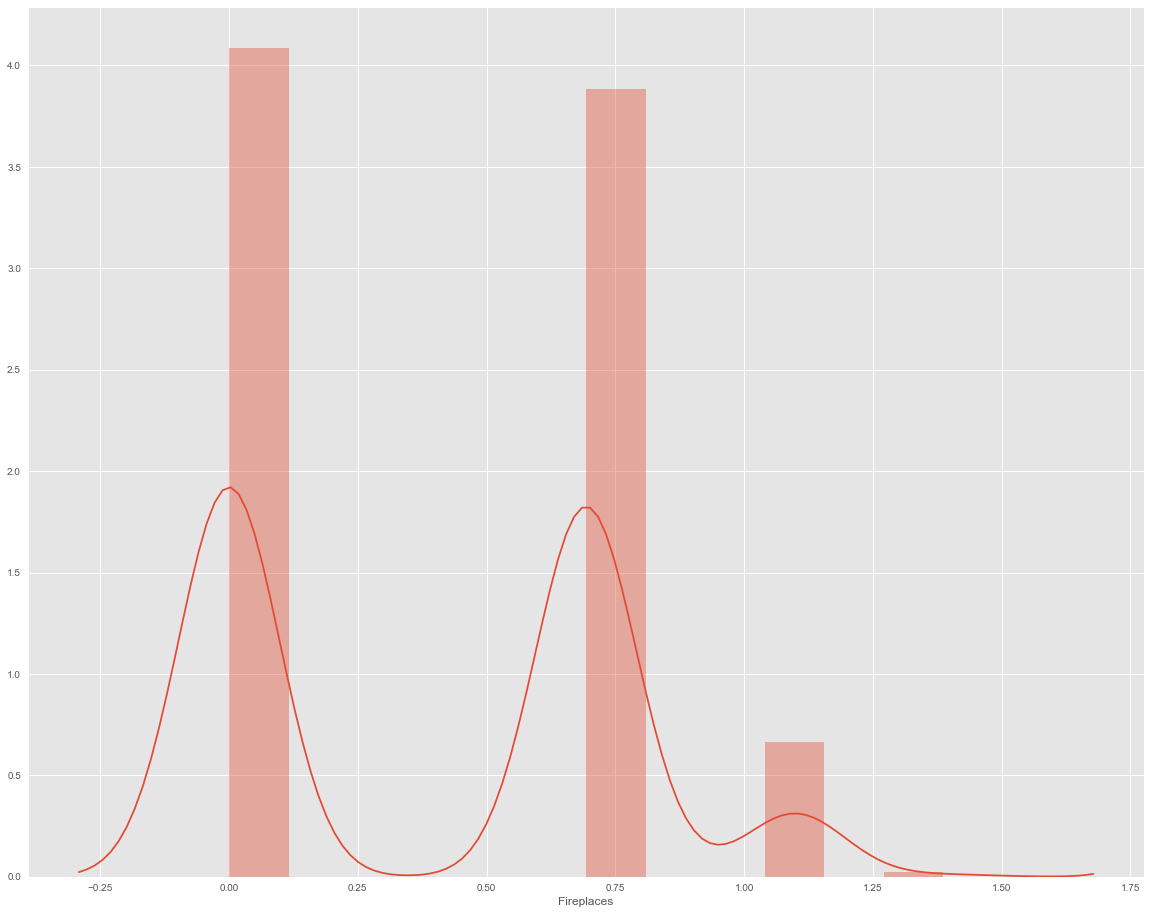

In [83]:
plt.figure(figsize=(20,16))
sns.distplot(df_num['Fireplaces']);

In [84]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
df_cat = pd.get_dummies(df_cat)
print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))

NAs for categorical features in df : 1
Remaining NAs for categorical features in df : 0


In [85]:
df_cat.columns

Index(['MSSubClass_SC120', 'MSSubClass_SC160', 'MSSubClass_SC180',
       'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC30',
       'MSSubClass_SC40', 'MSSubClass_SC45', 'MSSubClass_SC50',
       'MSSubClass_SC60',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)

In [86]:
# Join categorical and numerical features
df = pd.concat([df_num, df_cat], axis = 1)
print("New number of features : " + str(df.shape[1]))

# Partition the dataset in df + validation sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 0)

New number of features : 270


In [87]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1004, 270)
X_test : (431, 270)
y_train : (1004,)
y_test : (431,)


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:, numerical_features] = sc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = sc.transform(X_test.loc[:, numerical_features])

/Users/jimdoone/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
 #Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

##### Lasso

In [90]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 100000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7], 
                max_iter = 100000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)


print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00042
Lasso RMSE on Training set : 0.104455447472
Lasso RMSE on Test set : 0.136399535353


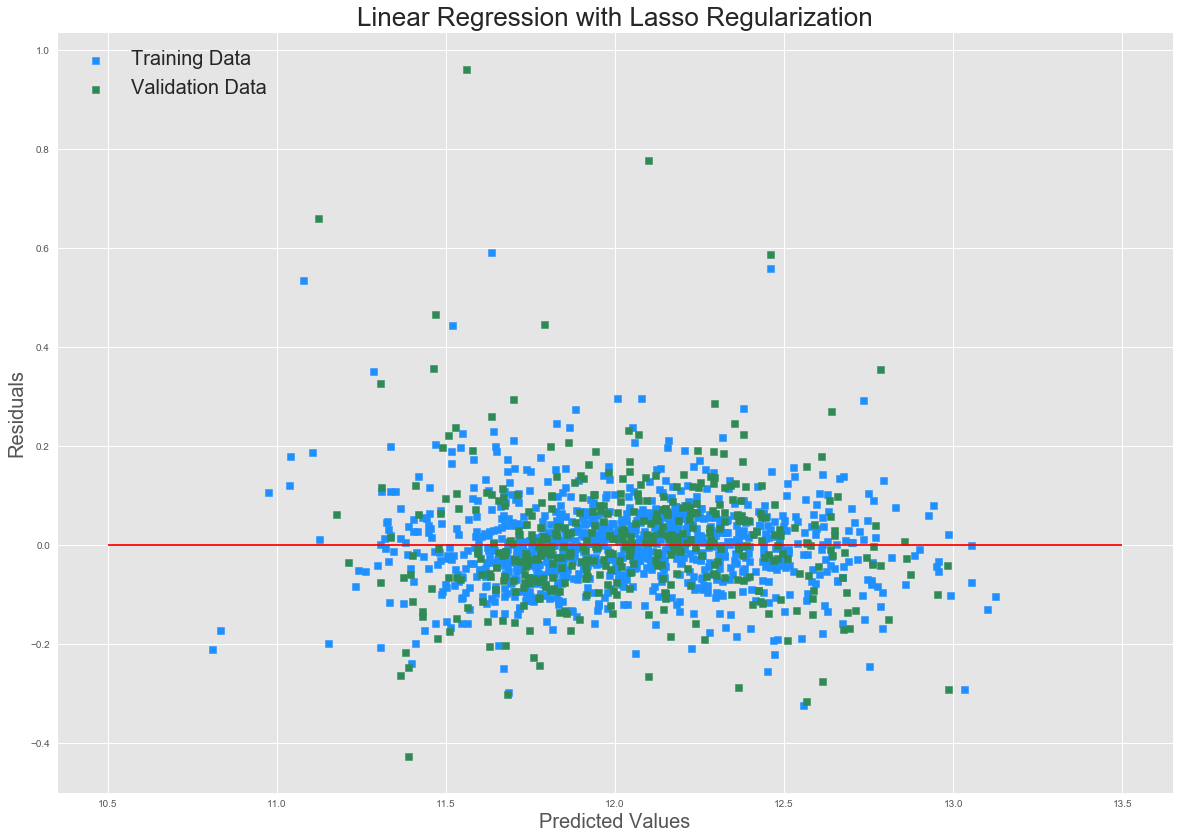

In [91]:

# Plot residuals
plt.figure(figsize=(20,14))
plt.scatter(y_train_las, y_train_las - y_train, c = "dodgerblue", marker = "s", label = "Training Data")
plt.scatter(y_test_las, y_test_las - y_test, c = "seagreen", marker = "s", label = "Validation Data")
plt.title("Linear Regression with Lasso Regularization", fontsize=26)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.legend(loc = "upper left", fontsize=20)
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()





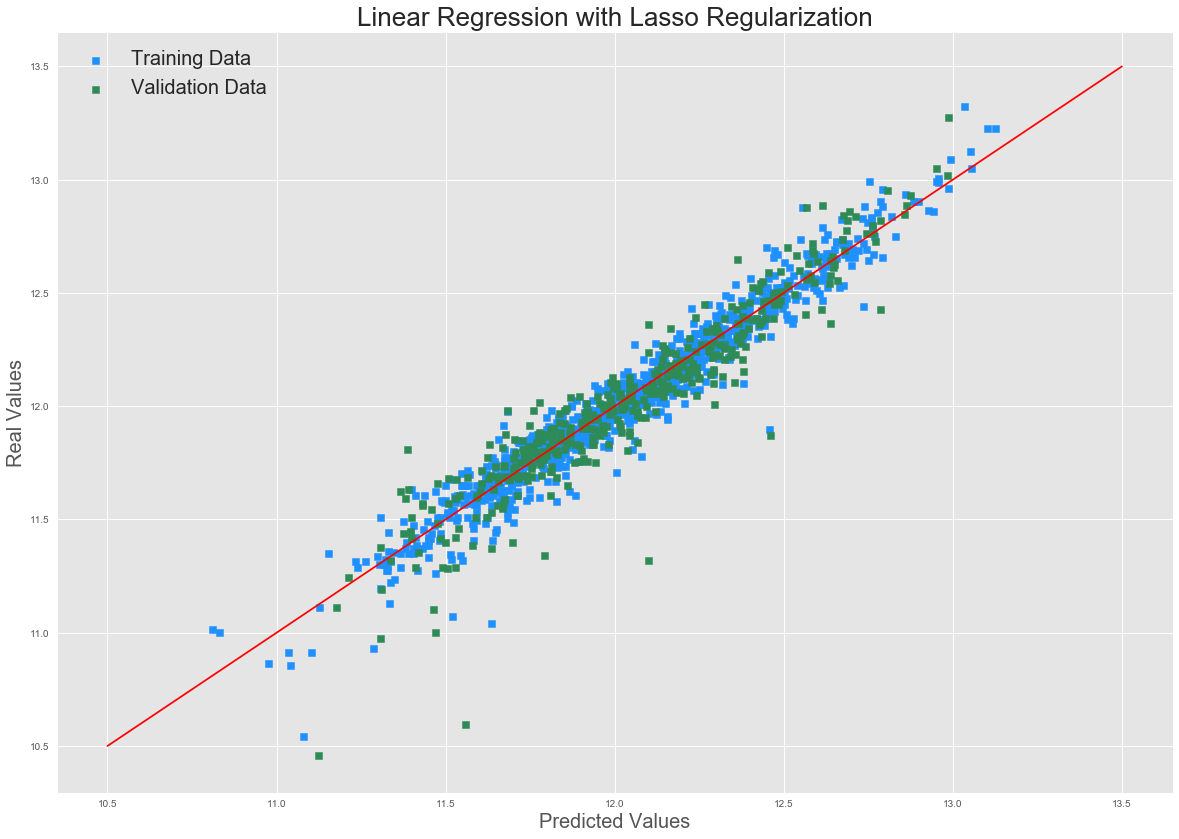

In [92]:
# Plot predictions



plt.figure(figsize=(20,14))
plt.scatter(y_train_las, y_train, c = "dodgerblue", marker = "s", label = "Training Data")
plt.scatter(y_test_las, y_test, c = "seagreen", marker = "s", label = "Validation Data")
plt.title("Linear Regression with Lasso Regularization", fontsize=26)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Real Values", fontsize=20)
plt.legend(loc = "upper left", fontsize=20)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()





Lasso picked 114 features and eliminated the other 156 features


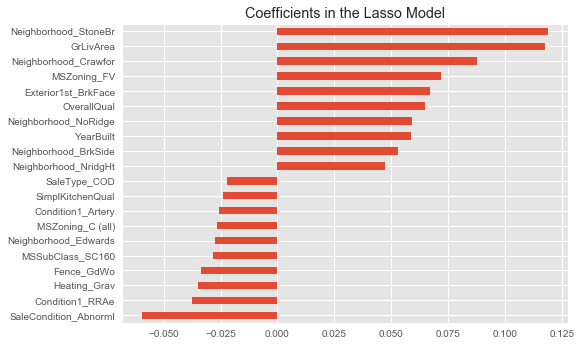

In [93]:


# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()


